In [84]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from algorithms import dijkstra, nearest_node, a_star, bellman_ford, SPFA
from tqdm import tqdm

In [3]:
# download the street network for Piedmont, CA
place_name = "Truc Bach, Ba Dinh, Hanoi, Vietnam"
graph_file = 'map/map_trucbach.graphml'

# Check if the graph file exists
graph = ox.load_graphml(graph_file)

In [7]:
import random

# Lấy danh sách các node từ graph
nodes = list(graph.nodes)

# Random ra hai node


Node 1: 103020184
Node 2: 8299505871
Path found


In [21]:
# Random ra hai điểm với tọa độ (x, y)
x1, y1 = random.uniform(105.83469, 105.85143), random.uniform(21.03979, 21.05118)
x2, y2 = random.uniform(105.83469, 105.85143), random.uniform(21.03979, 21.05118)
print(f"Điểm 1: ({x1}, {y1})")
print(f"Điểm 2: ({x2}, {y2})")

Điểm 1: (105.83949652258924, 21.042663228334202)
Điểm 2: (105.84655502341647, 21.051040276639032)


In [35]:
start_node, distance_start = nearest_node.nearest_node(graph, (x1, y1), k = 4, heuristic= nearest_node.heuristic)
end_node, distance_end = nearest_node.nearest_node(graph, (x2, y2), k = 4, heuristic= nearest_node.heuristic)
for i in range(4):
    for j in range(4):
        _, dis = dijkstra.dijkstra(graph, start_node[i], end_node[j])
        print(dis)

395.73099999999994
343.8929999999999
320.4429999999999
371.37999999999994
364.60299999999995
312.76499999999993
289.31499999999994
340.25199999999995
435.118
383.28
359.83
410.767
353.29400000000004
301.456
278.00600000000003
328.94300000000004


In [31]:
cnt = 0
while cnt < 500:
    x1, y1 = np.random.uniform(105.83469, 105.85143), np.random.uniform(21.03979, 21.05118)
    x2, y2 = np.random.uniform(105.83469, 105.85143), np.random.uniform(21.03979, 21.05118)
    start_node = nearest_node.nearest_node(graph, (x1, y1), k= 1, heuristic= nearest_node.heuristic)[0][0]
    end_node = nearest_node.nearest_node(graph, (x2, y2), k= 1, heuristic= nearest_node.heuristic)[0][0]
    if dijkstra.dijkstra(graph, start_node, end_node)[1] != None:
        cnt += 1
        with open('test_case.txt', 'a') as f:
            f.write(f"{x1} {y1} {x2} {y2}\n")

In [52]:
with open('test_case.txt', 'r') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        x1, y1, x2, y2 = map(float, line.split())
        start_node, distance_start = nearest_node.nearest_node(graph, (x1, y1), k = 8, heuristic= nearest_node.heuristic)
        end_node, distance_end = nearest_node.nearest_node(graph, (x2, y2), k= 8, heuristic= nearest_node.heuristic)
        for i in range(1, 9):
            min_dis = float('inf')
            for j in range(i):
                for k in range(i):
                    _, dis = dijkstra.dijkstra(graph, start_node[j], end_node[k])
                    if dis != None:
                        min_dis = min(min_dis, dis + distance_start[j] + distance_end[k])
                    else:
                        dis = float('inf')
            ans[i].append(min_dis)

100%|██████████| 500/500 [04:42<00:00,  1.77it/s]


In [53]:
df = pd.DataFrame(ans)

In [54]:
df

,1,2,3,4,5,6,7,8
0,896.532609,649.889662,649.889662,649.889662,629.990553,629.990553,623.676486,623.676486
1,1040.030158,1017.073020,1008.341629,1002.594270,1002.594270,1002.594270,608.011985,608.011985
2,505.864392,458.135053,458.135053,458.135053,453.385525,240.096632,182.587307,182.587307
3,521.575600,508.375623,416.710236,409.504572,409.504572,398.846346,372.970302,372.970302
4,597.393868,597.393868,571.975038,571.975038,532.189274,532.189274,518.982679,518.982679
...,...,...,...,...,...,...,...,...
495,1196.570991,1196.570991,1196.570991,744.140124,744.140124,744.140124,744.140124,744.140124
496,2273.686977,2273.686977,2273.686977,2273.686977,2258.419395,2009.626476,2009.626476,1995.334007
497,1976.016858,1789.686211,1789.686211,1759.534580,1759.534580,1759.534580,1759.534580,1759.534580
498,1822.338752,1752.623715,1752.623715,1752.623715,1752.623715,1752.623715,1752.623715,1752.623715


In [57]:
df.describe()

,1,2,3,4,5,6,7,8
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1337.032116,1275.761684,1247.519887,1227.245966,1213.630664,1201.109541,1190.514233,1181.830091
std,551.470908,551.819493,549.240299,545.307010,547.024502,545.552940,547.415099,546.961541
min,35.543133,22.038774,22.038774,22.038774,22.038774,22.038774,22.038774,22.038774
25%,909.121978,867.635170,838.788304,815.988486,794.507385,777.802571,769.594405,754.980123
50%,1342.572040,1270.362914,1244.423337,1223.167998,1204.398851,1198.066892,1175.549229,1174.219401
75%,1742.141612,1691.931949,1660.169187,1624.746045,1613.919826,1601.213909,1598.841960,1594.384950
max,2946.690222,2784.193661,2707.278757,2584.810757,2584.810757,2584.810757,2584.810757,2584.810757


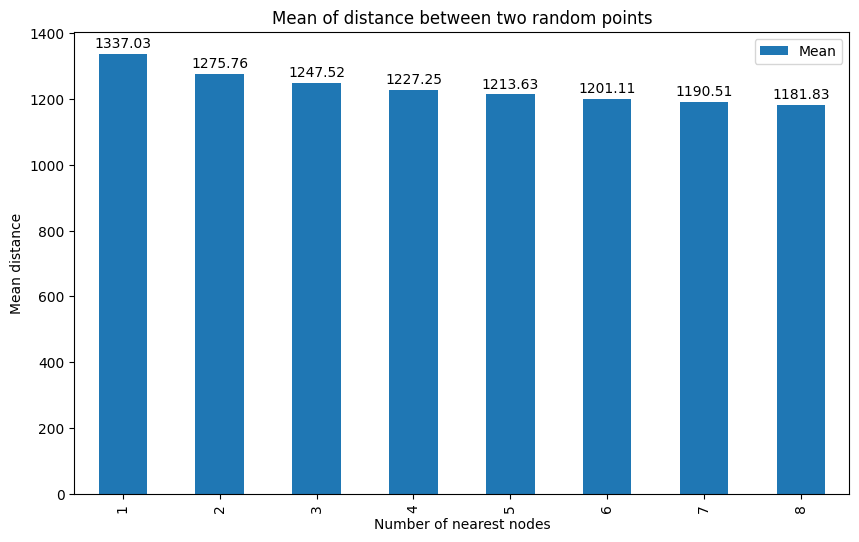

In [66]:
# Tính trung bình của các cột
mean_values = df.mean()

# Tạo dataframe mới để chứa các giá trị trung bình
summary_df = pd.DataFrame({'Mean': mean_values})

# Vẽ biểu đồ
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean of distance between two random points')
plt.xlabel('Number of nearest nodes')
plt.ylabel('Mean distance')
for i, value in enumerate(mean_values):
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [68]:
import time
times = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
ans = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

In [69]:
with open('test_case.txt', 'r') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        x1, y1, x2, y2 = map(float, line.split())
        start_node, distance_start = nearest_node.nearest_node(graph, (x1, y1), k = 8, heuristic= nearest_node.heuristic)
        end_node, distance_end = nearest_node.nearest_node(graph, (x2, y2), k= 8, heuristic= nearest_node.heuristic)
        for i in range(1, 9):
            start_time = time.time()
            min_dis = float('inf')
            for j in range(i):
                for k in range(i):
                    _, dis = dijkstra.dijkstra(graph, start_node[j], end_node[k])
                    if dis != None:
                        min_dis = min(min_dis, dis + distance_start[j] + distance_end[k])
                    else:
                        dis = float('inf')
            ans[i].append(min_dis)
            end_time = time.time()
            times[i].append(end_time - start_time)

100%|██████████| 500/500 [03:55<00:00,  2.12it/s]


In [71]:
time_df = pd.DataFrame(times)

In [72]:
time_df.describe()

,1,2,3,4,5,6,7,8
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.002551,0.009485,0.021941,0.036276,0.057030,0.082361,0.111741,0.146018
std,0.000828,0.001133,0.001519,0.002074,0.002791,0.003433,0.003222,0.004418
min,0.000000,0.003507,0.014495,0.030157,0.047755,0.067281,0.096478,0.127264
25%,0.002008,0.008828,0.021269,0.035066,0.055763,0.080593,0.110000,0.143819
50%,0.002534,0.009396,0.021988,0.036026,0.056748,0.082021,0.111487,0.145594
75%,0.003003,0.010062,0.022713,0.037092,0.057929,0.083646,0.113201,0.147656
max,0.008673,0.014146,0.029665,0.057178,0.092024,0.125590,0.137259,0.199258


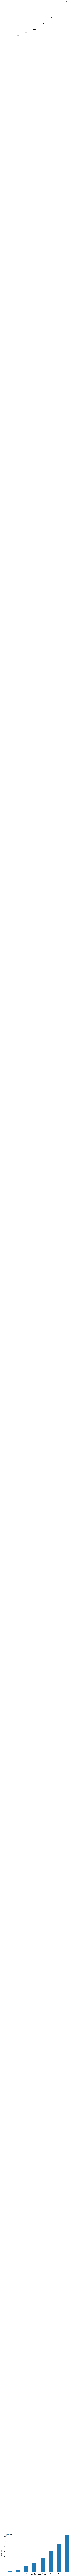

In [73]:
# Tính trung bình của các cột
mean_values = time_df.mean()

# Tạo dataframe mới để chứa các giá trị trung bình
summary_times = pd.DataFrame({'Mean': mean_values})

# Vẽ biểu đồ
summary_times.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of nearest nodes')
plt.ylabel('Mean time')
for i, value in enumerate(mean_values):
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [100]:
times_algo = {'dijkstra': [], 'a_star': [], 'SPFA': []}

In [101]:
with open('test_case.txt', 'r') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        x1, y1, x2, y2 = map(float, line.split())
        start_node, distance_start = nearest_node.nearest_node(graph, (x1, y1), k = 8, heuristic= nearest_node.heuristic)
        end_node, distance_end = nearest_node.nearest_node(graph, (x2, y2), k= 8, heuristic= nearest_node.heuristic)
        for j in times_algo.keys():
            start_time = time.time()
            min_dis = float('inf')
            for id1, i in enumerate(start_node):
                for id2, k in enumerate(end_node):
                    dis = None
                    if j == 'dijkstra':
                        _, dis = dijkstra.dijkstra(graph, i, k)
                    elif j == 'a_star':
                        path, dis = a_star.a_star(graph, i, k, heuristic= a_star.heuristic)
                    elif j == 'SPFA':
                        _, dis = SPFA.spfa(graph, i, k)
                    if dis != None:
                        min_dis = min(min_dis, dis + distance_start[id1] + distance_end[id2])
                    else:
                        dis = float('inf')
            end_time = time.time()
            times_algo[j].append(time.time() - start_time)

100%|██████████| 500/500 [05:36<00:00,  1.49it/s]


In [102]:
times_algo_df = pd.DataFrame(times_algo)
times_algo_df.describe()

,dijkstra,a_star,SPFA
count,500.000000,500.000000,500.000000
mean,0.178424,0.098159,0.390914
std,0.051060,0.071506,0.137945
min,0.124587,0.018353,0.186841
25%,0.143627,0.046281,0.294166
50%,0.147148,0.076108,0.350390
75%,0.241507,0.124915,0.458984
max,0.379887,0.453505,0.885965


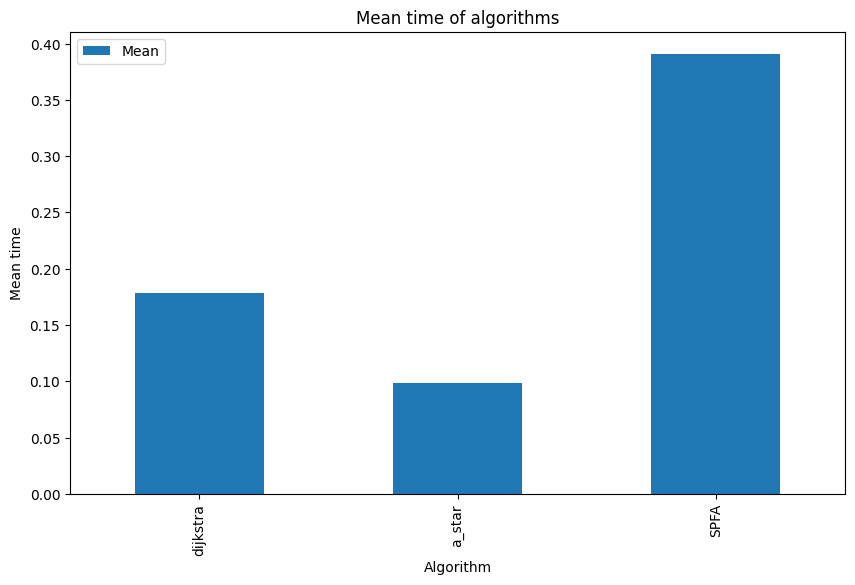

In [107]:
mean_values_times = times_algo_df.mean()

# Tạo dataframe mới để chứa các giá trị trung bình
summary_times_algo = pd.DataFrame({'Mean': mean_values_times})

# Vẽ biểu đồ
summary_times_algo.plot(kind='bar', figsize=(10, 6))
plt.title('Mean time of algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean time')

plt.show()